In [10]:
import os


dft_data = os.environ["DATA"] + "/00_datasets/DFT/cache_OPT_OD9_0.csv"

output_fig_path = os.environ["FIGURES"] + "/03_paper_popalg/homo_lumo_hist.png"
figsize = (8, 8*2/3)

In [151]:
import csv
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
import matplotlib.pyplot as plt

def extract_data():
    with open(dft_data, "r") as f:
        reader = csv.reader(f)

        smiles = []
        homos = []
        lumos = []

        
        for i, row in enumerate(reader):
            
            if row[0] == "C":
                idx_methane = i - 1

            if i > 0:
                smiles.append(row[0])
                homos.append(float(row[1]))
                lumos.append(float(row[2]))
                
    return np.array(smiles), np.array(homos), np.array(lumos), idx_methane


def plot():
    
    smiles, homos, lumos, idx_methane = extract_data()
    
    print(idx_methane)
    
    plt.figure(figsize=figsize)
    
    sns.set_palette("colorblind")
    
    p = sns.distplot(homos, hist_kws={"label": "HOMO"}, norm_hist=True, kde=True, hist=True)
    sns.distplot(lumos, hist_kws={"label": "LUMO"}, norm_hist=True, kde=True, hist=True)
    
    plt.arrow(homos[idx_methane], 0.1, 0, -0.07, head_width=0.3, head_length=0.03, width=0.01, fc='#0173b2', ec='#0173b2')
    plt.arrow(lumos[idx_methane], 0.1, 0, -0.07, head_width=0.3, head_length=0.03, width=0.01, fc='#de8f05', ec='#de8f05')
    
    plt.text(homos[idx_methane]-0.4, 0.11, "CH₄")
    plt.text(lumos[idx_methane]-0.4, 0.11, "CH₄")
    
    sns.despine(left=True)
    p.set(yticks=[])


    plt.legend()
    plt.tight_layout()
    plt.savefig(output_fig_path, dpi=300)

    

48


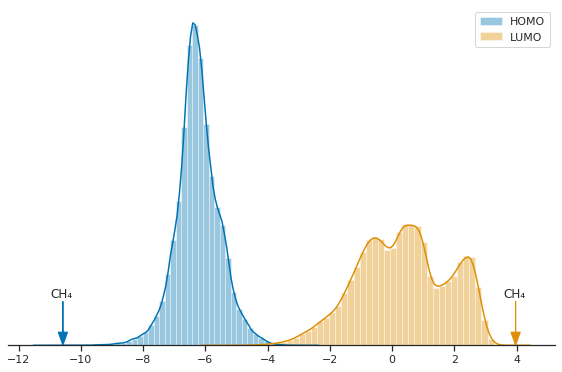

In [152]:
plot()